In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def relu3(x):
    return tf.where(x <= 0, 0, x**3)

# differential equation 
# y'' = x, y(0) = 0, y(1) = 0
def x_true_y(t):
    return(1/6)*t*((t**2)-1)

# differential equation 
# y'' = sqrtx, y(0) = 0, y(1) = 0
def sqrt_true_y(t):
    return (4/15)*t*((t**(3/2))-1)

# differential equation 
# y'' = sinx, y(0) = 0, y(1) = 0
def sin_true_y(t):
    return t*np.sin(1) - np.sin(t)

class ODENet_Shallow(tf.keras.Model):
    def __init__(self, layer1params = 100):
        super(ODENet_Shallow, self).__init__()
        layer1_parameters = layer1params
        self.dense1 = tf.keras.layers.Dense(layer1_parameters, activation=relu3, kernel_initializer = 'random_normal')
        self.output_layer = tf.keras.layers.Dense(1) 

    def call(self, x):
        x = self.dense1(x)
        return self.output_layer(x)
    
class ODENet_Deep(tf.keras.Model):
    def __init__(self, layer1params = 100, layer2params = 100):
        super(ODENet_Deep, self).__init__()
        layer1_parameters = layer1params
        layer2_parameters = layer2params
        self.dense1 = tf.keras.layers.Dense(layer1_parameters, activation=relu3)
        self.dense2 = tf.keras.layers.Dense(layer2_parameters, activation=relu3)
        self.output_layer = tf.keras.layers.Dense(1) 
    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return self.output_layer(x)
    
model = ODENet_Deep()

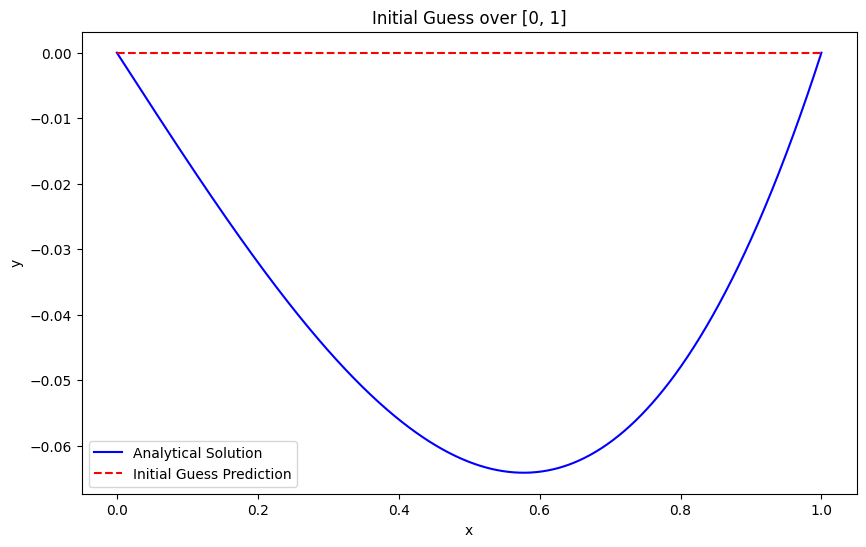

In [2]:
#initial guess

test_n = 1000
x_test = np.linspace(0, 1, test_n).reshape(-1, 1)
y_true = x_true_y(x_test)
y_pred = model(x_test)

plt.figure(figsize=(10, 6))
plt.plot(x_test, y_true, label='Analytical Solution', color='blue')
plt.plot(x_test, y_pred, label='Initial Guess Prediction', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Initial Guess over [0, 1]')
plt.show()

In [3]:
# differential equation 
# y'' = x, y(0) = 0, y(1) = 0
def f(x):
    return x

# differential equation 
# y'' = sinx, y(0) = 0, y(1) = 0
def sin(x):
    return np.sin(x)

# differential equation 
# y'' = sqrtx, y(0) = 0, y(1) = 0
def sqrt(x):
    return np.sqrt(x)

def loss_fn(model, x):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y = model(x)
        dy_dx = tape.gradient(y, x)
        d2y_dx2 = tape.gradient(dy_dx, x)

    # Residual from the differential equation
    residual = d2y_dx2 - f(x)

    # Calculate the loss as the squared error
    loss = tf.reduce_mean(tf.square(residual)) 

    # Add boundary conditions to the loss
    loss += 0.5 * tf.square(model(tf.constant([[0.0]], dtype=tf.float32)))
    loss += 0.5 * tf.square(model(tf.constant([[1.0]], dtype=tf.float32)))
    
    #regularization_penalty = 0.05 * tf.reduce_sum([tf.nn.l2_loss(w) for w in model.trainable_weights])
    #loss += regularization_penalty  # Add the regularization term to the loss
    
    return loss

In [4]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.05)

def train_step(model, x):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, x)
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return loss

In [5]:
num_training_points = 1000
x_samples = tf.convert_to_tensor(np.linspace(0, 1, num_training_points).reshape(-1, 1), dtype=tf.float32)
epochs = 10000
for step in range(epochs):
    loss = train_step(model, x_samples)
    if step % 100 == 0:
        print(f"Step: {step}, Function Loss: {loss.numpy()}")

Step: 0, Function Loss: [[0.3335022]]
Step: 100, Function Loss: [[0.008496]]
Step: 200, Function Loss: [[0.01625576]]
Step: 300, Function Loss: [[0.00647218]]
Step: 400, Function Loss: [[0.00652869]]
Step: 500, Function Loss: [[0.0073673]]
Step: 600, Function Loss: [[0.00698477]]
Step: 700, Function Loss: [[0.00746876]]
Step: 800, Function Loss: [[0.00686693]]
Step: 900, Function Loss: [[0.00757543]]
Step: 1000, Function Loss: [[0.00738356]]
Step: 1100, Function Loss: [[0.00667496]]
Step: 1200, Function Loss: [[0.0067789]]
Step: 1300, Function Loss: [[0.00699268]]
Step: 1400, Function Loss: [[0.00691375]]
Step: 1500, Function Loss: [[0.00808417]]
Step: 1600, Function Loss: [[0.00676757]]
Step: 1700, Function Loss: [[0.00749496]]
Step: 1800, Function Loss: [[0.00672934]]
Step: 1900, Function Loss: [[0.00712567]]
Step: 2000, Function Loss: [[0.00669666]]
Step: 2100, Function Loss: [[0.00745677]]
Step: 2200, Function Loss: [[0.00650879]]
Step: 2300, Function Loss: [[0.00762165]]
Step: 240

KeyboardInterrupt: 

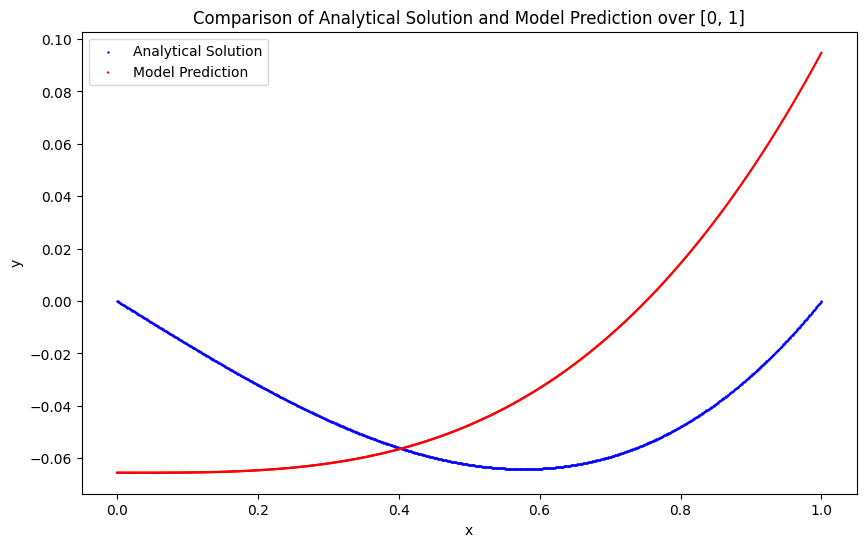

In [6]:
test_n = 1000
x_test = np.linspace(0, 1, test_n).reshape(-1, 1)
y_true = x_true_y(x_test)
y_pred = model(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_true, label='Analytical Solution', color='blue', s = 0.5)
plt.scatter(x_test, y_pred, label='Model Prediction', color='red', linestyle='--', s =0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Analytical Solution and Model Prediction over [0, 1]')
plt.show()

In [18]:
weights = model.count_params()
weights

901

In [10]:
model.summary()

Model: "ode_net__deep"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  200       
                                                                 
 dense_1 (Dense)             multiple                  10100     
                                                                 
 dense_2 (Dense)             multiple                  101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
max_error_array = np.absolute(y_true - y_pred)
max_error = np.max(max_error_array)
max_error

0.078075565

In [109]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01)

max_error_array = np.array([])
final_loss_array = np.array([])
parameters_count_array = np.array([])

for i in range(1,10):
    neurons = i*100
    network = ODENet_Shallow(neurons)

    
    num_training_points = 1000

    x_samples = tf.convert_to_tensor(np.linspace(0, 1, num_training_points).reshape(-1, 1), dtype=tf.float32)
    
    epochs = 1000
    for step in range(epochs):
        loss = train_step(network, x_samples)
    
    test_n = 1000
    x_test = np.linspace(0, 1, test_n).reshape(-1, 1)
    y_true = x_true_y(x_test)
    y_pred = network(x_test)
    
    error_array = np.absolute(y_true - y_pred)
    max_error = np.max(error_array)
    max_error_array = np.append(max_error_array, max_error)
    final_loss_array = np.append(final_loss_array, loss)
    parameters_count_array = np.append(parameters_count_array, network.count_params())

In [1]:
final_loss_array

NameError: name 'final_loss_array' is not defined

In [111]:
loss = final_loss_array
params = parameters_count_array
error = max_error_array

In [112]:
loss

array([0.00738676, 0.00138278, 0.0013448 , 0.00133589, 0.00119878,
       0.00088537, 0.00127961, 0.00115253, 0.00106384])

In [113]:
params

array([<bound method Layer.count_params of <__main__.ODENet_Shallow object at 0x000002411F9ABA00>>,
       <bound method Layer.count_params of <__main__.ODENet_Shallow object at 0x000002411F9D1450>>,
       <bound method Layer.count_params of <__main__.ODENet_Shallow object at 0x000002411FAEF520>>,
       <bound method Layer.count_params of <__main__.ODENet_Shallow object at 0x000002411FAEE230>>,
       <bound method Layer.count_params of <__main__.ODENet_Shallow object at 0x000002411FAEE8C0>>,
       <bound method Layer.count_params of <__main__.ODENet_Shallow object at 0x00000241202CE860>>,
       <bound method Layer.count_params of <__main__.ODENet_Shallow object at 0x000002411FB11C90>>,
       <bound method Layer.count_params of <__main__.ODENet_Shallow object at 0x000002411FB105E0>>,
       <bound method Layer.count_params of <__main__.ODENet_Shallow object at 0x000002411FAA2F50>>],
      dtype=object)

In [114]:
error

array([0.07738871, 0.00366002, 0.00176901, 0.00206944, 0.00172436,
       0.00164238, 0.0028086 , 0.00289586, 0.00293688])

In [104]:
import pandas as pd

df = pd.DataFrame()
df['num_parameters'] = params
df['final loss'] = loss
df['max_error'] = error 

df

df.to_csv('sinxrelu3shallow.csv')